In [1]:
%load_ext autoreload
%autoreload 2

# 为了可视化

另外 你再多做一张图for visualization purpose, 画好了你先传overleaf就行:

你对CIFAR images做0.05和0.5的crop-scale得到两组图片 (set A and set B)，然后从两组随机挑5张CIFAR图片 (但需要是pair的, a1-b1, a2-b2, ..., a5-b5, 这样能对比不同强度augmentation对同一张图片的效果), 然后把r0和S值附上 (不需要重新算, 就从你结果里拿)

Files already downloaded and verified


d:\anaconda\envs\PyTorchGpu\Lib\site-packages\torchvision\transforms\functional.py:1603: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).
  warnings.warn(


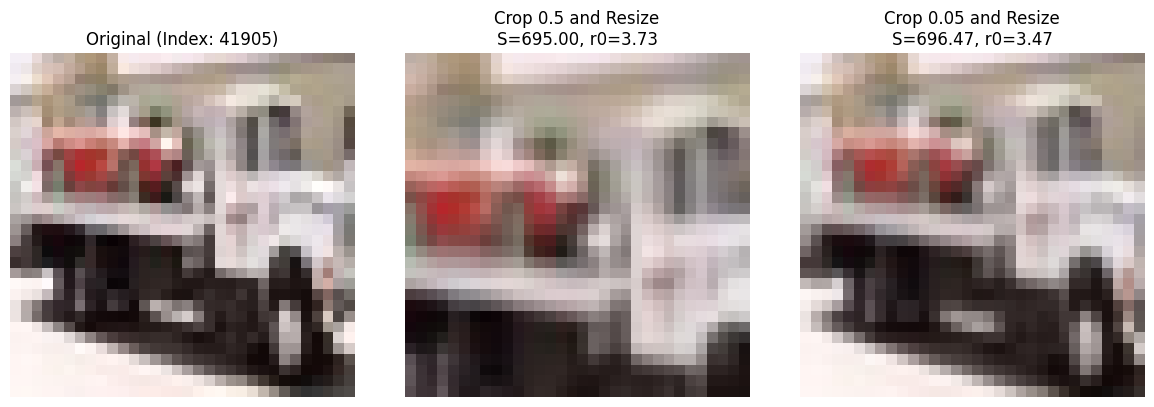

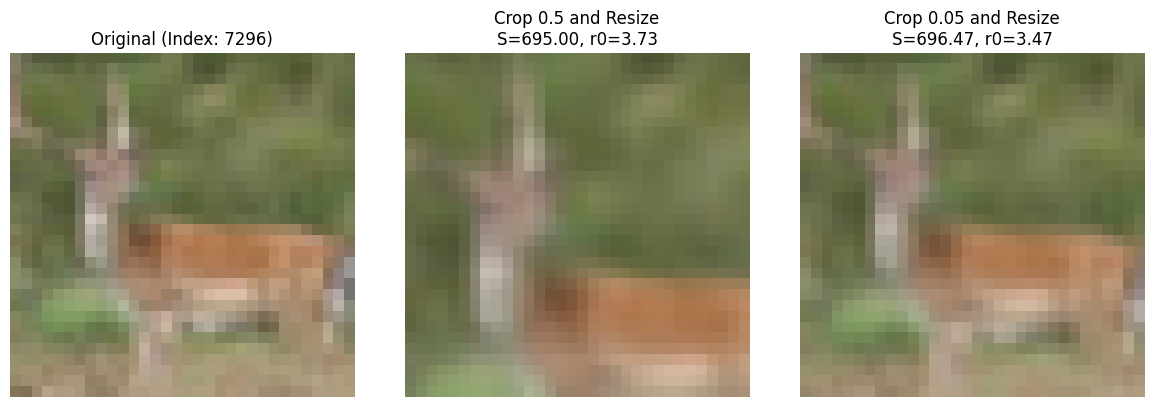

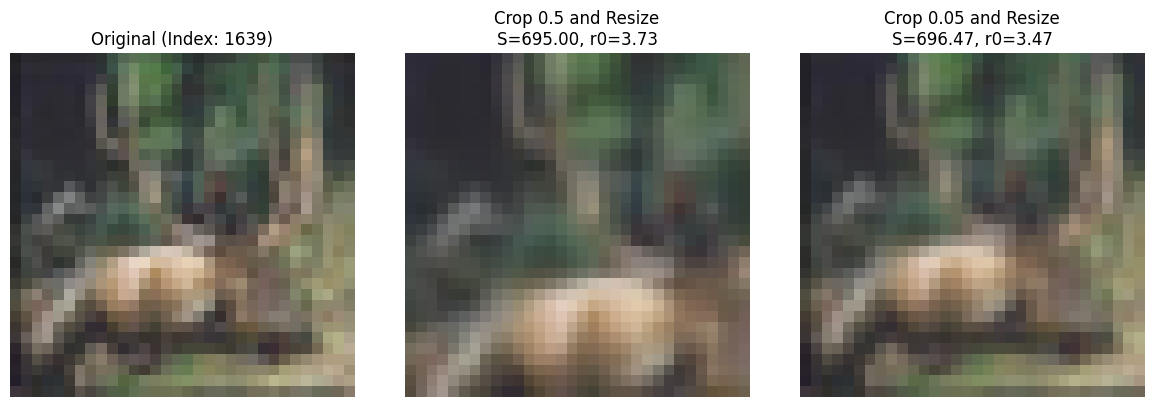

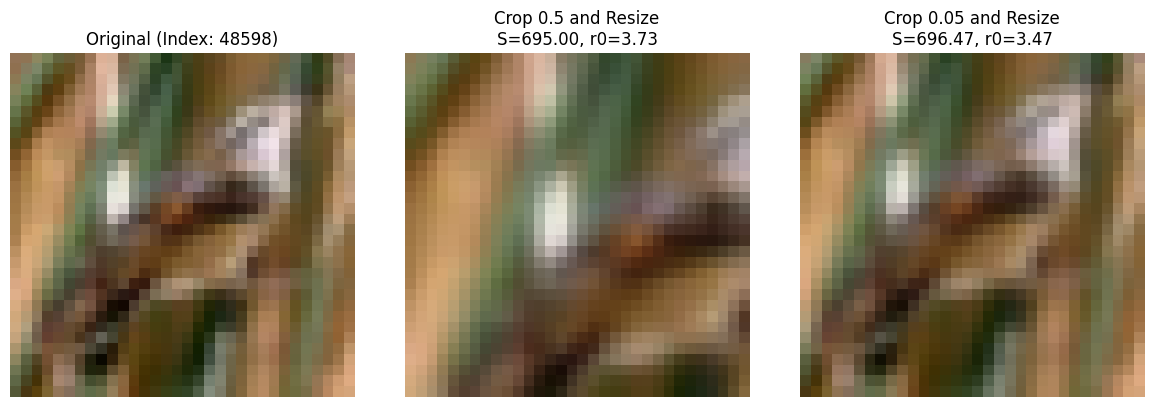

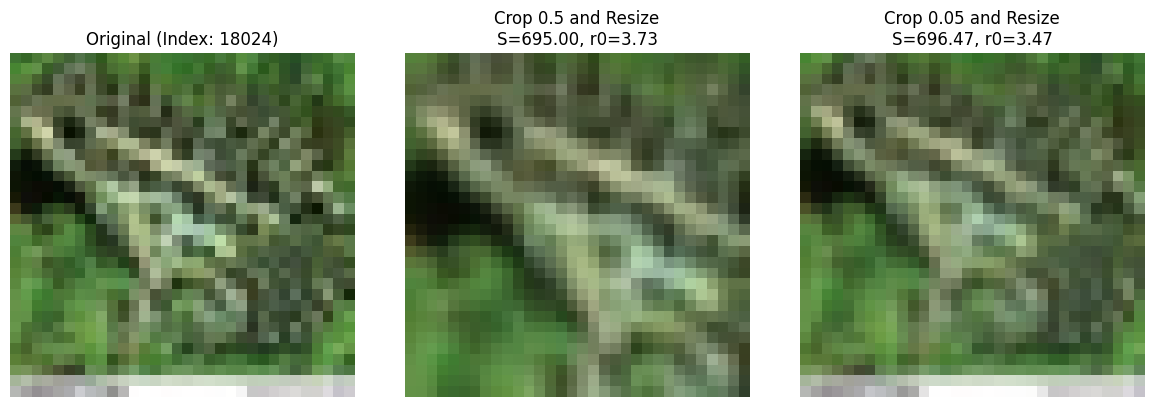

In [13]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import random

# 设置随机种子以确保结果可重复
random.seed(42)
torch.manual_seed(42)

# 定义CIFAR-10数据集的转换
transform = transforms.Compose([
    transforms.ToTensor(),
])

# 加载CIFAR-10数据集
cifar10_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# 从数据集中随机选择5张图片
sample_indices = random.sample(range(len(cifar10_dataset)), 5)
sample_images = [cifar10_dataset[i][0] for i in sample_indices]

# 定义两种不同的Crop和Resize变换
crop_resize_1 = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.95, 0.95), ratio=(1, 1)),
    transforms.Resize(32),
])

crop_resize_2 = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.5, 0.5), ratio=(1, 1)),
    transforms.Resize(32),
])

# 可视化原始图片和增强后的图片
for i, (image, index) in enumerate(zip(sample_images, sample_indices), 1):
    plt.figure(figsize=(12, 4))

    # 显示原始图片
    plt.subplot(1, 3, 1)
    plt.imshow(image.permute(1, 2, 0))
    plt.title(f'Original (Index: {index})')
    plt.axis('off')

    # 第一种Crop和Resize
    augmented_image_1 = crop_resize_1(image)
    plt.subplot(1, 3, 3)
    plt.imshow(augmented_image_1.permute(1, 2, 0))
    plt.title(f'Crop 0.05 and Resize\nS=696.47, r0=3.47')
    plt.axis('off')

    # 第二种Crop和Resize
    augmented_image_2 = crop_resize_2(image)
    plt.subplot(1, 3, 2)
    plt.imshow(augmented_image_2.permute(1, 2, 0))
    plt.title(f'Crop 0.5 and Resize\nS=695.00, r0=3.73')
    plt.axis('off')

    plt.tight_layout()
    plt.show()


Files already downloaded and verified


C:\Users\jack2\AppData\Local\Temp\ipykernel_35768\1438257785.py:63: UserWarning: Tight layout not applied. tight_layout cannot make axes width small enough to accommodate all axes decorations
  plt.tight_layout()


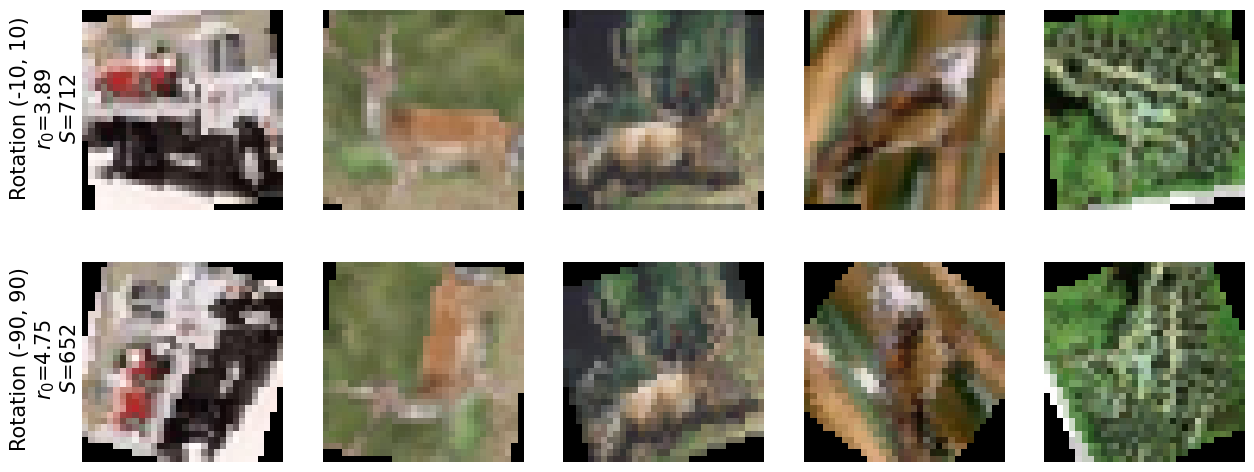

In [30]:
import torch
import torchvision.transforms as transforms
from torchvision.datasets import CIFAR10
import matplotlib.pyplot as plt
import random

# 设置随机种子以确保结果可重复
random.seed(42)
torch.manual_seed(42)

# 定义CIFAR-10数据集的转换
transform = transforms.Compose([
    transforms.ToTensor(),
])

# 加载CIFAR-10数据集
cifar10_dataset = CIFAR10(root='./data', train=True, download=True, transform=transform)

# 从数据集中随机选择5张图片
sample_indices = random.sample(range(len(cifar10_dataset)), 5)
sample_images = [cifar10_dataset[i][0] for i in sample_indices]

# 定义两种不同的Crop和Resize变换
crop_resize_1 = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.95, 0.95), ratio=(1, 1)),
    transforms.Resize(32),
])

crop_resize_2 = transforms.Compose([
    transforms.RandomResizedCrop(32, scale=(0.5, 0.5), ratio=(1, 1)),
    transforms.Resize(32),
])

# 定义两种不同的旋转变换
rotate_1 = transforms.Compose([
    transforms.RandomRotation(degrees=(-10, 10)),
])

rotate_2 = transforms.Compose([
    transforms.RandomRotation(degrees=(-90, 90)),
])

# 可视化增强后的图片
plt.figure(figsize=(15, 6))

for i, (image, index) in enumerate(zip(sample_images, sample_indices), 1):
    
    # 应用旋转变换
    rotated_image_1 = rotate_1(image)
    plt.subplot(2, 5, i)
    plt.imshow(rotated_image_1.permute(1, 2, 0))
    # plt.title(f'Rotation (-10, 10)')
    plt.axis('off')

    rotated_image_2 = rotate_2(image)
    plt.subplot(2, 5, i + 5)
    plt.imshow(rotated_image_2.permute(1, 2, 0))
    # plt.title(f'Rotation (-90, 90)')
    plt.axis('off')
# 在每行的最左边添加旋转的描述
plt.text(-160, -25, r'Rotation (-10, 10)'+'\n'+r'$r_0$=3.89'+'\n'+r'$S$=712', ha='center', va='center', rotation='vertical', fontsize=15)
plt.text(-160, 15, r'Rotation (-90, 90)'+'\n'+r'$r_0$=4.75'+'\n'+'$S$=652', ha='center', va='center', rotation='vertical', fontsize=15)
plt.tight_layout()
plt.savefig('./test/cifar_visualization.pdf')
plt.show()
